In [8]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.model_selection import train_test_split
sb.set() # set the default Seaborn style for graphics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder #imported all for testing
from sklearn.compose import ColumnTransformer

TEST_SIZE = 0.2

In [9]:
csv_data = pd.read_csv('../data/Road Accident Data.csv', low_memory=False)
csv_data['Accident_Severity'] = csv_data['Accident_Severity'].replace(['Fetal'], ['Fatal'])

working_data = pd.DataFrame(csv_data[['Accident_Severity','Weather_Conditions','Light_Conditions','Number_of_Vehicles','Road_Type','Time','Speed_limit','Urban_or_Rural_Area']])

col = 'Accident_Severity'
unique_values = working_data[col].unique()

Serious_data = working_data[working_data['Accident_Severity'] == "Serious"]
slight_data = working_data[working_data['Accident_Severity'] == "Slight"]
fatal_data = working_data[working_data['Accident_Severity'] == "Fatal"]

col = 'Accident_Severity'
unique_values = Serious_data[col].unique()

unique_values = slight_data[col].unique()
unique_values = fatal_data[col].unique()
slight_data = slight_data.sample(4000)
Serious_data = Serious_data.sample(4000)
col = 'Accident_Severity'
unique_values = slight_data[col].unique()
unique_values = Serious_data[col].unique()

combined_df = pd.concat([Serious_data, slight_data, fatal_data], ignore_index=True)
combined_df = combined_df.sample(frac=1)
combined_df.head()

col = 'Accident_Severity'
unique_values = combined_df[col].unique()

data = combined_df.copy() 

In [10]:
X = data[['Weather_Conditions','Light_Conditions','Number_of_Vehicles','Road_Type','Time','Speed_limit','Urban_or_Rural_Area']]
Y = data['Accident_Severity']
#Y['Accident_Severity'] = Y['Accident_Severity'].replace('fetal', 'fatal')
#print(df.columns)
counts = data['Accident_Severity'].value_counts()
print(counts)

Accident_Severity
Serious    4000
Slight     4000
Fatal      3953
Name: count, dtype: int64


In [11]:
categorical_features = ['Weather_Conditions', 'Light_Conditions', 'Road_Type', 'Time', 'Urban_or_Rural_Area']
one_hot_encoder = OneHotEncoder()
preprocessor = ColumnTransformer(transformers=[('cat', one_hot_encoder, categorical_features)], remainder='passthrough')
X_encoded = preprocessor.fit_transform(X)

In [12]:
# Extract feature names
if hasattr(preprocessor, 'get_feature_names_out'):
    feature_names = preprocessor.get_feature_names_out()
else:
    feature_names = ['feature'+str(i) for i in range(X_encoded.shape[1])]

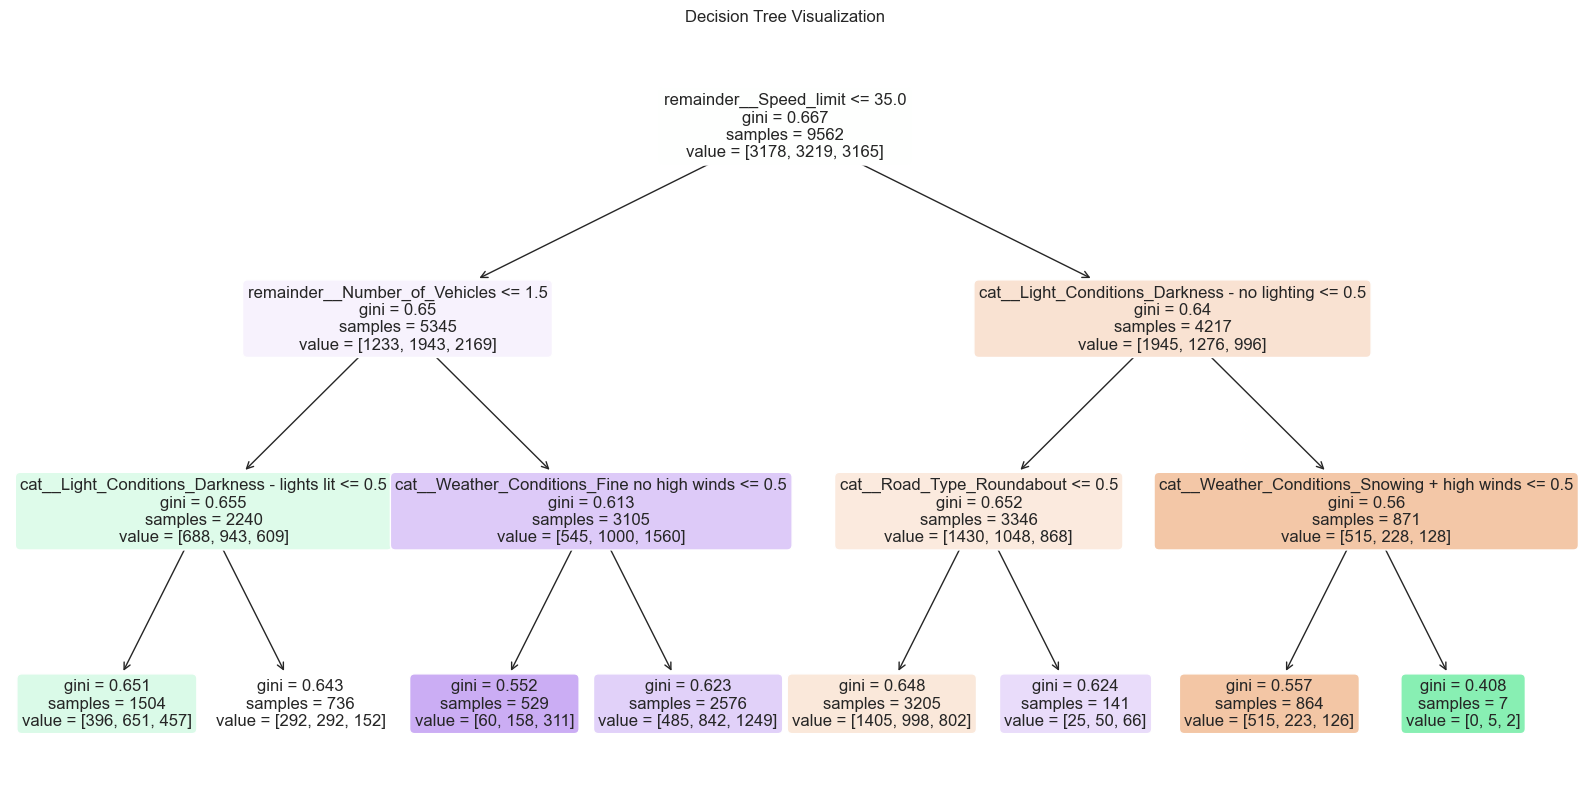

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=TEST_SIZE, random_state=1) #Random state of one is being used to get reproduceable results
tree_model = DecisionTreeClassifier(max_depth=3) #verbose to monitor progress 
tree_model.fit(X_train, y_train)

#class_names = ['Serious', 'Fetal','Slight']
plt.figure(figsize=(20, 10))  # Set the size of the figure
plot_tree(tree_model, filled=True, feature_names=feature_names.tolist(), fontsize = 12, rounded = True)
plt.title('Decision Tree Visualization')
plt.show()


In [14]:
y_pred = tree_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

Accuracy: 0.4634044332915098
Classification Report:
              precision    recall  f1-score   support

       Fatal       0.45      0.67      0.54       775
     Serious       0.42      0.20      0.27       781
      Slight       0.50      0.52      0.51       835

    accuracy                           0.46      2391
   macro avg       0.46      0.46      0.44      2391
weighted avg       0.46      0.46      0.44      2391

Confusion Matrix:
[[516 103 156]
 [351 159 271]
 [283 119 433]]


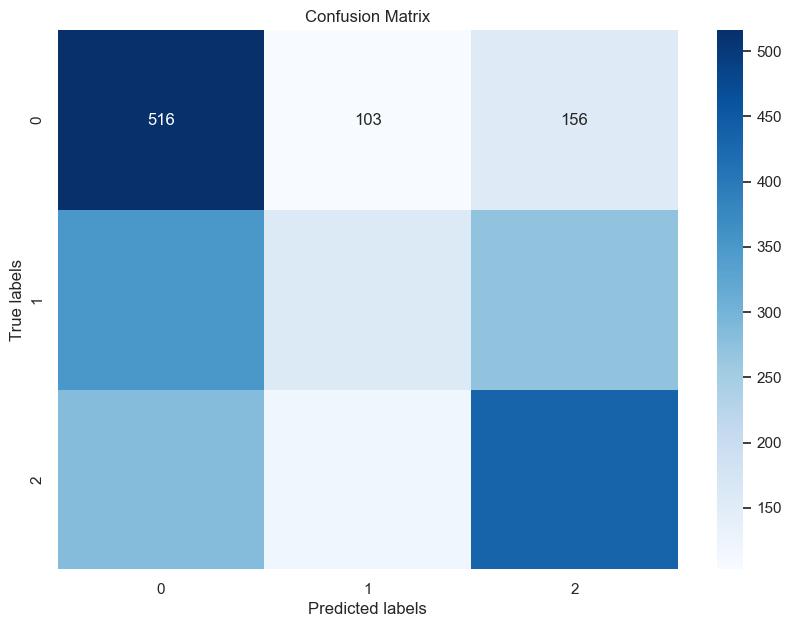

In [15]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sb.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

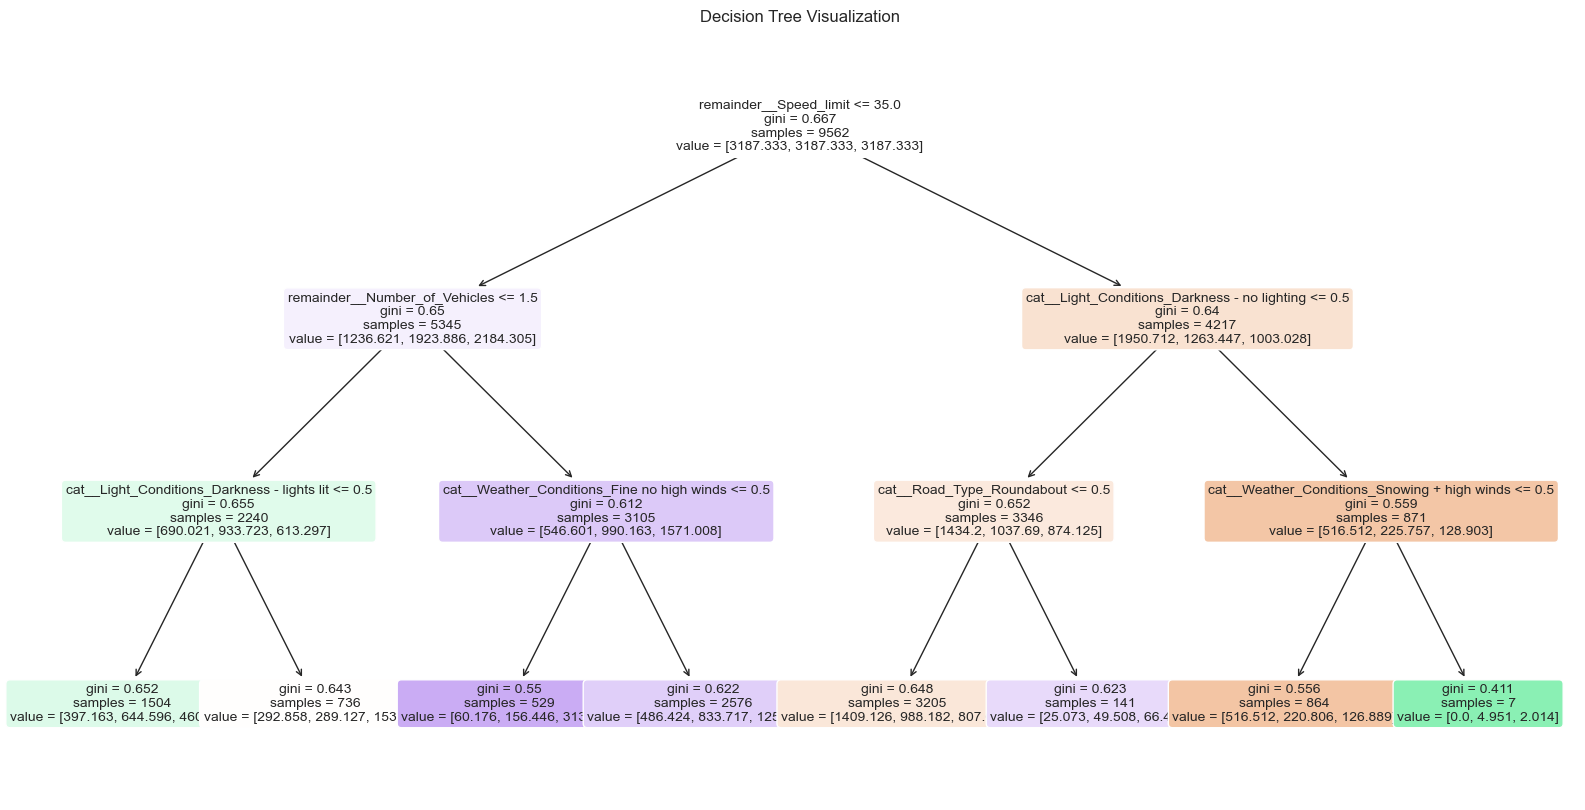

In [16]:
tree_model2 = DecisionTreeClassifier(max_depth=3,class_weight='balanced') #class_weight='balanced' to adjust weights inversely proportional to class frequencies
tree_model2.fit(X_train, y_train)

plt.figure(figsize=(20, 10))  # Set the size of the figure
plot_tree(tree_model2, filled=True, feature_names=feature_names.tolist(), fontsize = 10, rounded = True)
plt.title('Decision Tree Visualization')
plt.show()

In [17]:
y_pred2 = tree_model2.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred2)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred2)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred2)}")

Accuracy: 0.4634044332915098
Classification Report:
              precision    recall  f1-score   support

       Fatal       0.45      0.67      0.54       775
     Serious       0.42      0.20      0.27       781
      Slight       0.50      0.52      0.51       835

    accuracy                           0.46      2391
   macro avg       0.46      0.46      0.44      2391
weighted avg       0.46      0.46      0.44      2391

Confusion Matrix:
[[516 103 156]
 [351 159 271]
 [283 119 433]]


In [35]:
feature_importances = tree_model.feature_importances_

In [36]:
print("Feature Importances:\n")
for feature, importance in zip(data.feature_names, feature_importances):
    print(f"{feature}: {importance:.4f}")

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.bar(data.feature_names, feature_importances, color='blue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

Feature Importances:



AttributeError: 'DataFrame' object has no attribute 'feature_names'